# Analýza dát

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [23]:
df_graduates = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
df_teachers_summary = pd.read_csv('../data/preprocessed/cvtisr/teachers_summary.csv', sep=';')
df_teachers_degrees = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')
df_dotacie = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv', sep=',')

In [24]:
display(df_teachers_summary)

,univerzita,rok,počet full-time zamestnancov,počet part-time zamestnancov
0,AU,2009,90,26
1,AU,2010,95,21
2,AU,2011,105,21
3,AU,2012,105,20
4,AU,2013,106,29
...,...,...,...,...
275,ŽU,2018,558,51
276,ŽU,2019,559,37
277,ŽU,2020,545,39
278,ŽU,2021,518,44


In [25]:
display(df_teachers_degrees)

,univerzita,rok,typ učiteľa,úväzok,DrSc.,"CSc., PhD.",iný/žiadny titul,spolu
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0
...,...,...,...,...,...,...,...,...
3343,ŽU,2022,lektor,part-time,0,0,3,3
3344,ŽU,2022,odborný asistent,full-time,0,226,3,229
3345,ŽU,2022,odborný asistent,part-time,0,32,0,32
3346,ŽU,2022,profesor,full-time,2,86,0,88


In [26]:
display(df_graduates)

,univerzita,rok,abs 1.-2.stupeň denní,abs 1.-2.stupeň externí,abs 3.stupeň denní,abs 3.stupeň externí,abs 3.stupeň externých vzdelávacích inštitúcií
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0
...,...,...,...,...,...,...,...
255,ŽU,2017,2068,281,77,15,0
256,ŽU,2018,2018,135,79,12,0
257,ŽU,2019,1999,100,78,14,0
258,ŽU,2020,1909,121,74,16,0


In [27]:
display(df_dotacie)

,rok,univerzita,dotacie,mzdy,dotacie-stud,studenti,studenti-denni,ubyt-kap-sd,ubyt-studenti-sd,prispevok-sd,pub-podiel-07711,pub-podiel-07712,inflation_rate,dotacie_ia
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.000000,77024560.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.000000,21034252.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.000000,17921956.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.000000,6960463.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.000000,9082561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2019,VŠMU,8261537.0,3366153,114409,1038.0,866.0,0.0,0.0,0.0,0.100600,0.030693,1.148322,7194442.0
216,2019,VŠVU,4917691.0,2075631,77000,655.0,588.0,0.0,0.0,0.0,0.168586,0.029081,1.148322,4282501.0
217,2019,AU,4355457.0,1939438,149566,564.0,504.0,136.0,108.0,6912.0,0.116859,0.018455,1.148322,3792887.8
218,2019,KU,9598736.0,3606449,955393,3692.0,2440.0,647.0,472.0,18752.0,1.756360,1.331955,1.148322,8358922.5


## Počty učiteľov

In [28]:
typy = df_teachers_degrees["typ učiteľa"].unique()
roky = df_teachers_degrees["rok"].unique()
univerzity = df_teachers_degrees["univerzita"].unique()

pocty = {}
for rok in roky:
    temp = df_teachers_degrees[df_teachers_degrees["rok"] == rok]
    counts = temp.groupby("typ učiteľa")["spolu"].sum()
    for typ in typy:
        if rok not in pocty:
            pocty[rok] = dict()
        pocty[rok][typ] = counts[typ]
        
#display(pocty)
        

In [29]:
df = pd.DataFrame(pocty).transpose()
display(df)

,asistent,docent,hosťujúci profesor,lektor,odborný asistent,profesor
2009,437,2237,0,154,7022,1531
2010,432,2245,0,149,6751,1501
2011,412,2285,0,160,6498,1496
2012,405,2357,0,160,6394,1512
2013,398,2385,0,163,6393,1533
2014,368,2528,0,206,6108,1570
2015,361,2521,0,237,5953,1522
2016,366,2502,0,234,5860,1511
2017,394,2540,0,228,5784,1458
2018,408,2538,0,229,5838,1440


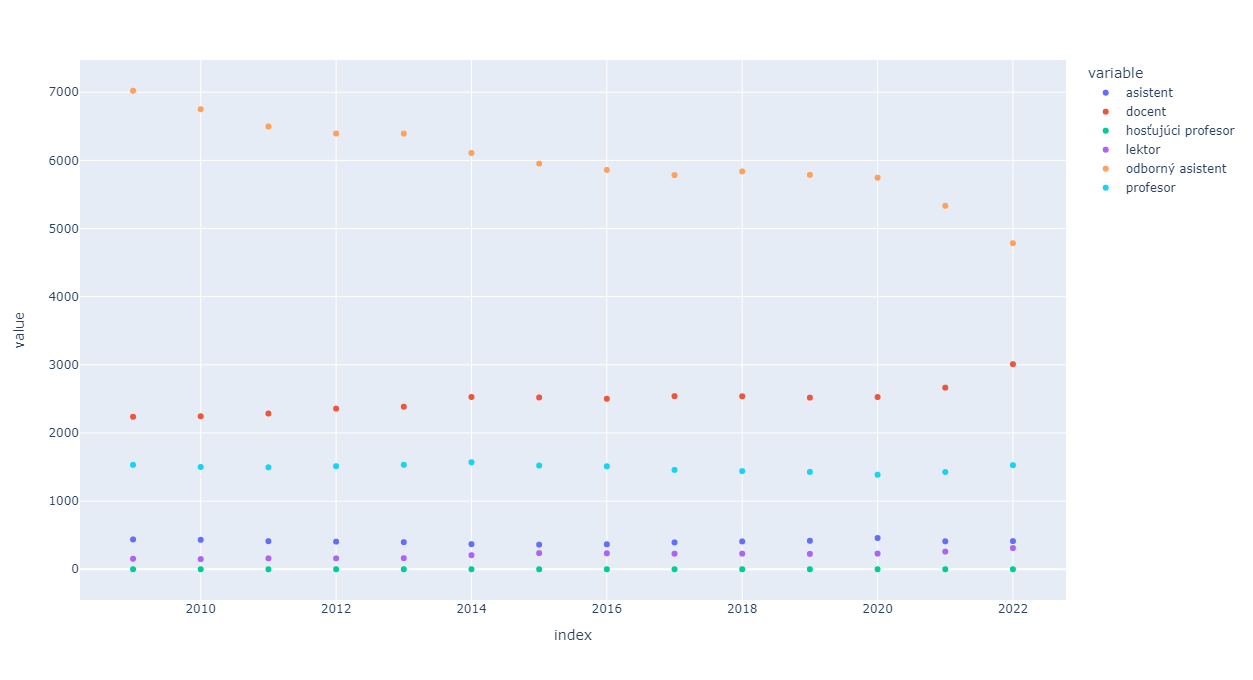

In [30]:
px.scatter(df, width=1100, height=680)

In [31]:
ucitelia_celkovo = {}

for rok in roky:
    if rok not in ucitelia_celkovo:
        ucitelia_celkovo[rok] = {}
    temp1 = df_teachers_degrees[df_teachers_degrees["rok"] == rok]
    
    for univerzita in univerzity:
        temp2 = temp1[temp1["univerzita"] == univerzita]
        sucet = temp2["spolu"].sum()
        
        ucitelia_celkovo[rok][univerzita] = sucet
        
ucitelia_celkovo = pd.DataFrame(ucitelia_celkovo).transpose()
display(ucitelia_celkovo)

,AU,EU,KU,PU,SPU,STU,TUAD,TUKE,TUZVO,TVU,UCM,UJS,UK,UKF,UMB,UPJŠ,UVL,VŠMU,VŠVU,ŽU
2009,116,705,443,788,488,1251,267,910,296,367,315,83,2183,639,702,633,170,233,104,688
2010,116,654,425,691,473,1245,225,880,278,381,326,84,2187,594,665,658,182,232,107,675
2011,126,653,453,691,470,1201,196,852,269,366,299,92,2111,567,624,670,191,244,107,669
2012,125,654,428,627,456,1189,199,835,274,353,346,101,2172,569,623,658,203,254,108,654
2013,135,624,417,597,463,1200,186,838,266,347,354,112,2216,590,629,678,202,262,109,647
2014,139,603,457,599,467,1156,174,833,261,350,358,107,2192,584,565,712,217,254,112,640
2015,135,569,424,579,467,1130,165,821,248,325,344,113,2217,555,568,722,215,238,115,644
2016,130,527,391,579,466,1081,156,789,264,321,342,123,2264,562,541,740,225,243,120,609
2017,131,507,367,584,458,1044,137,788,244,328,335,129,2298,552,534,762,219,251,120,616
2018,127,489,352,595,456,1028,136,796,241,316,335,135,2405,550,506,778,219,261,120,608


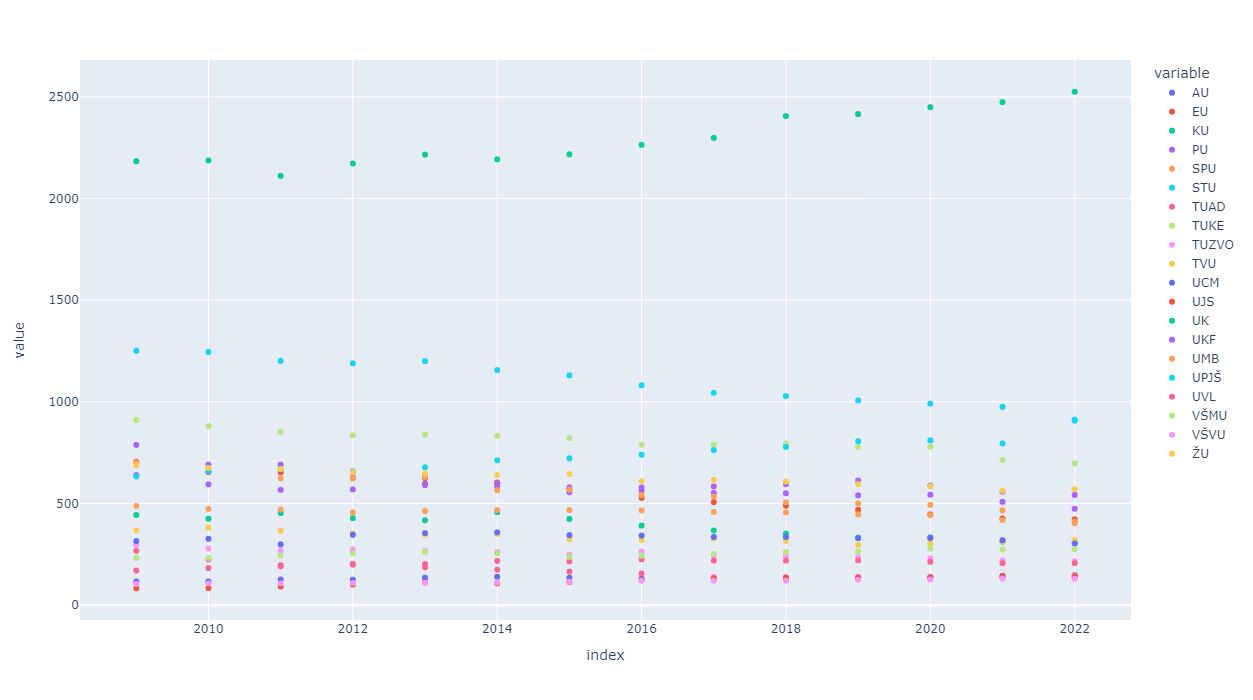

In [32]:
px.scatter(ucitelia_celkovo, height=700)

## Počty absolventov

In [33]:
absolventi = {"univerzita":df_graduates["univerzita"],
             "pocet":df_graduates["abs 1.-2.stupeň denní"] + df_graduates["abs 1.-2.stupeň externí"],
             "rok":df_graduates["rok"]}
absolventi = pd.DataFrame(absolventi)
display(absolventi)

,univerzita,pocet,rok
0,AU,189,2009
1,AU,199,2010
2,AU,200,2011
3,AU,196,2012
4,AU,173,2013
...,...,...,...
255,ŽU,2349,2017
256,ŽU,2153,2018
257,ŽU,2099,2019
258,ŽU,2030,2020


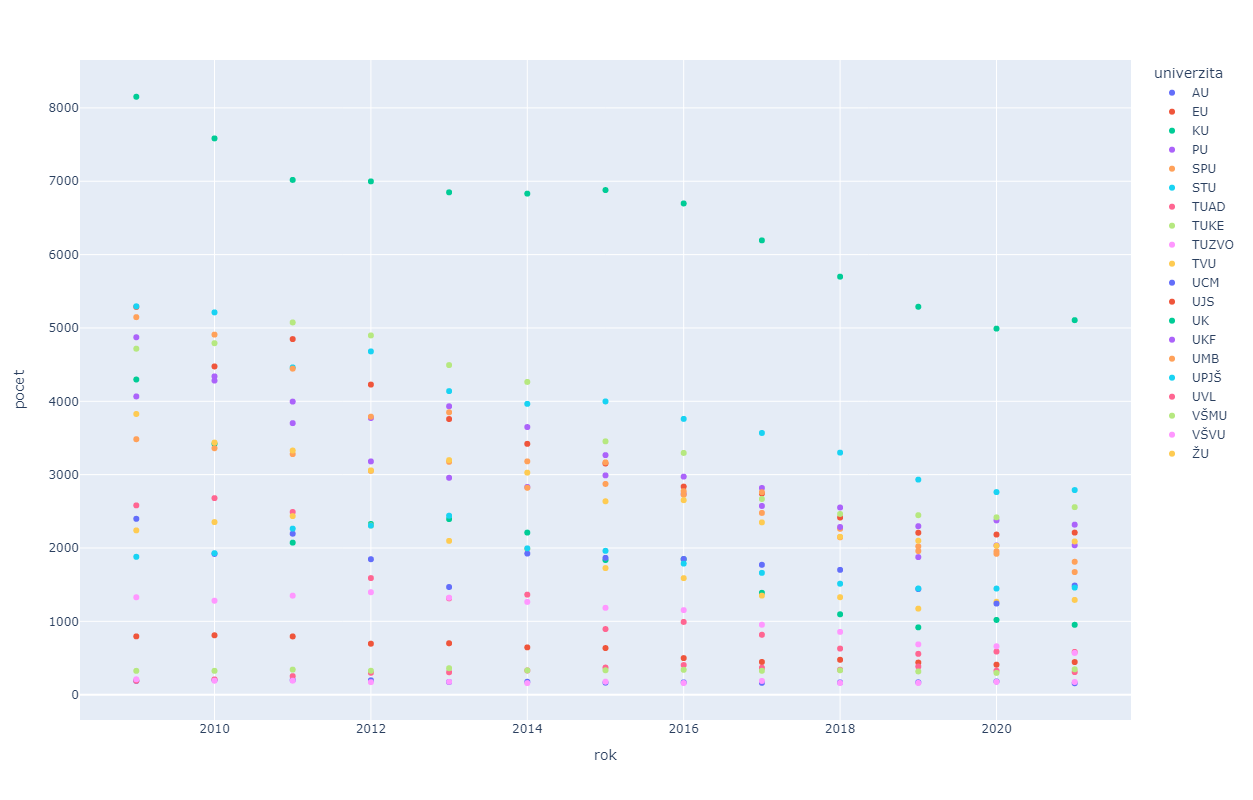

In [34]:
px.scatter(absolventi, x="rok", y="pocet", color="univerzita", height=800)

## Počty absolventov doktorandov

In [35]:
absolventi_doktorandi = {"univerzita":df_graduates["univerzita"],
             "pocet":df_graduates["abs 3.stupeň denní"] + df_graduates["abs 3.stupeň externí"],
             "rok":df_graduates["rok"]}
absolventi_doktorandi = pd.DataFrame(absolventi_doktorandi)


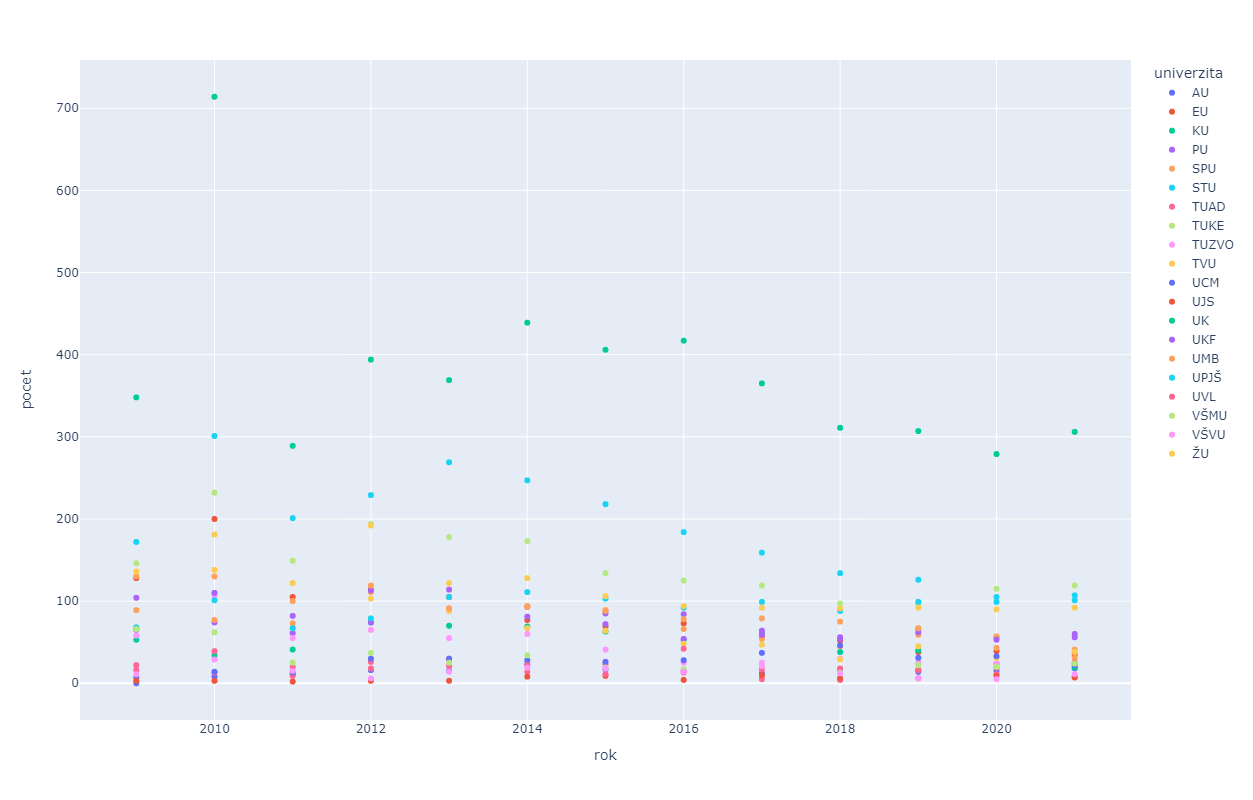

In [36]:
px.scatter(absolventi_doktorandi, x="rok", y="pocet", color="univerzita", height=800)

In [37]:
absolventi_celkovo = {"univerzita":absolventi["univerzita"],
                     "rok":absolventi["rok"],
                     "absolventi":absolventi["pocet"],
                     "doktorandi":absolventi_doktorandi["pocet"]}
absolventi_celkovo = pd.DataFrame(absolventi_celkovo)
absolventi_celkovo["abs/dokt"] = round(absolventi_celkovo["absolventi"]/absolventi_celkovo["doktorandi"], 2)
absolventi_celkovo["celkovo"] = absolventi_celkovo["absolventi"] + absolventi_celkovo["doktorandi"]

#display(absolventi_celkovo)

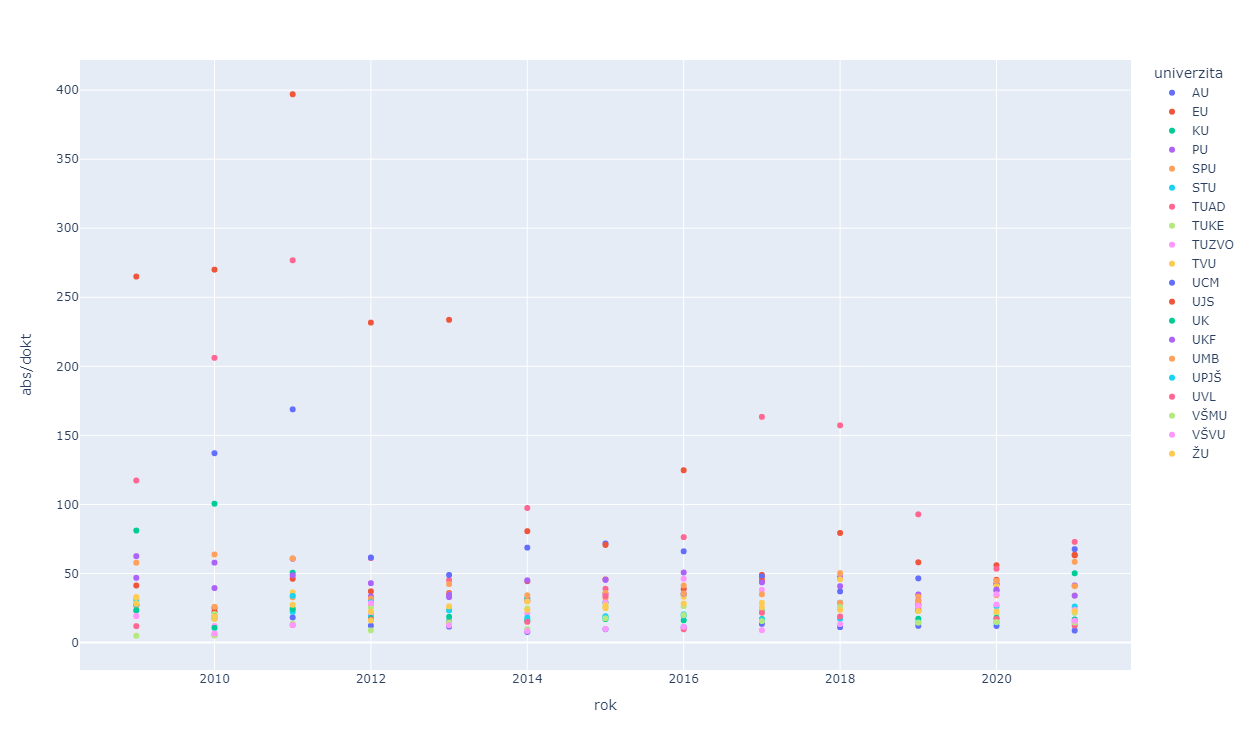

In [38]:
px.scatter(absolventi_celkovo, x="rok", y="abs/dokt",color="univerzita", height=750)

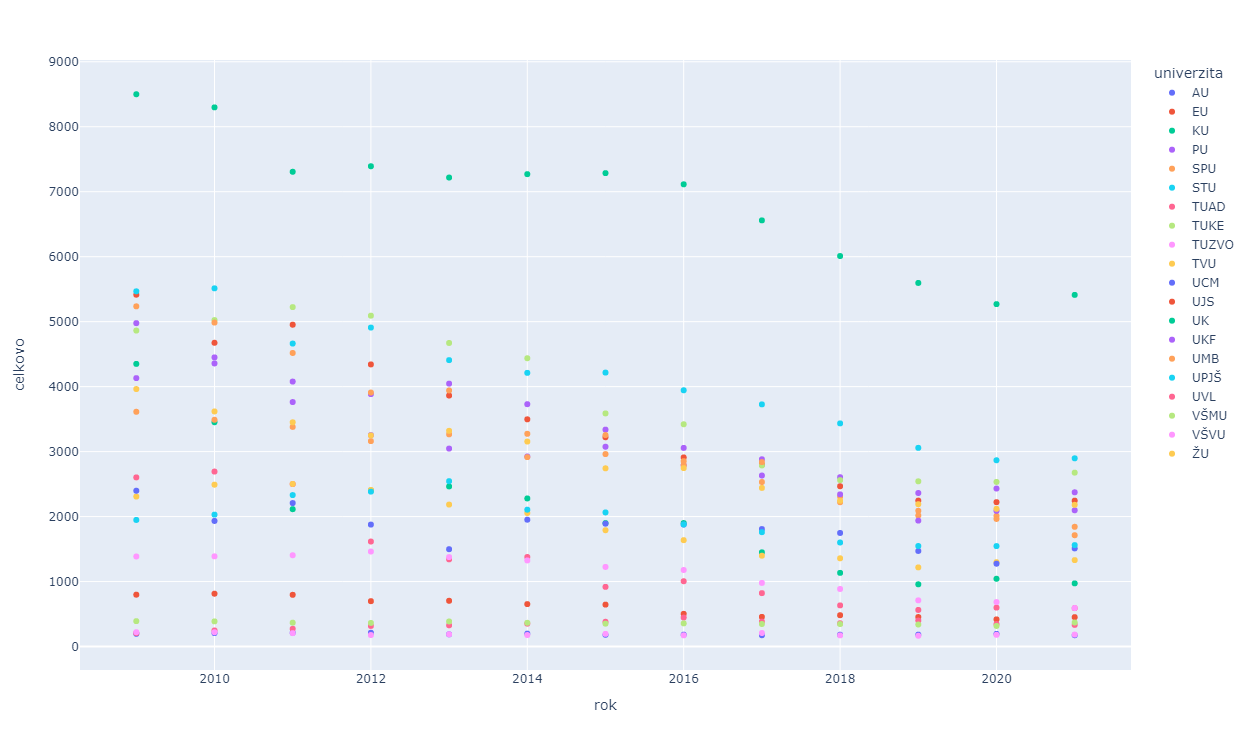

In [39]:
px.scatter(absolventi_celkovo, x="rok", y="celkovo",color="univerzita", height=750)

## Počty študentov


In [52]:
studenti = {"rok":df_dotacie["rok"],
            "univerzita":df_dotacie["univerzita"],
    "studenti":df_dotacie["studenti"]}

studenti = pd.DataFrame(studenti)
display(studenti)

,rok,univerzita,studenti
0,2009,UK,28439.0
1,2009,UPJŠ,8137.0
2,2009,PU,12399.0
3,2009,UCM,7129.0
4,2009,UVL,1454.0
...,...,...,...
215,2019,VŠMU,1038.0
216,2019,VŠVU,655.0
217,2019,AU,564.0
218,2019,KU,3692.0


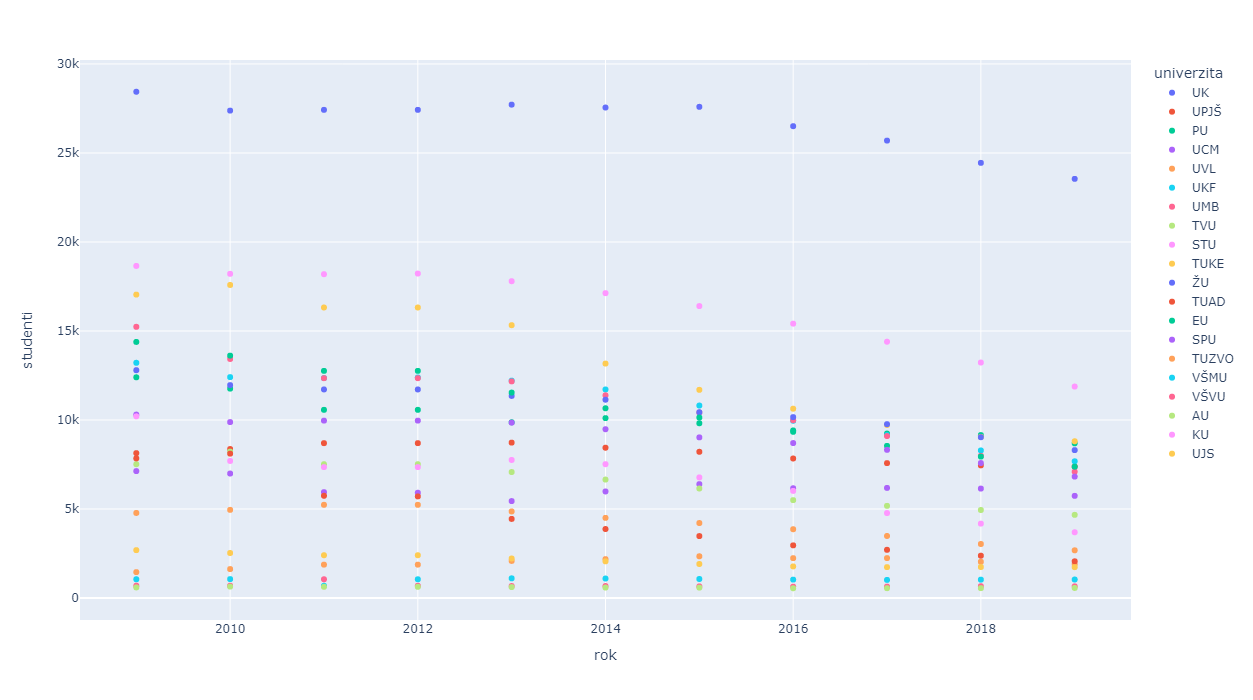

In [41]:
px.scatter(studenti, x="rok", y="studenti", color="univerzita", height=700)

In [42]:
temp = df_teachers_degrees.groupby(["univerzita","rok"])["spolu"].sum().to_frame("spolu").reset_index()
display(temp)

,univerzita,rok,spolu
0,AU,2009,116
1,AU,2010,116
2,AU,2011,126
3,AU,2012,125
4,AU,2013,135
...,...,...,...
275,ŽU,2018,608
276,ŽU,2019,595
277,ŽU,2020,584
278,ŽU,2021,562


In [53]:
studenti = studenti.merge(temp, on=["univerzita", "rok"], how="left")
studenti["student/ucit"] = round(studenti["studenti"] / studenti["spolu"], 2)
display(studenti)

,rok,univerzita,studenti,spolu,student/ucit
0,2009,UK,28439.0,2183,13.03
1,2009,UPJŠ,8137.0,633,12.85
2,2009,PU,12399.0,788,15.73
3,2009,UCM,7129.0,315,22.63
4,2009,UVL,1454.0,170,8.55
...,...,...,...,...,...
215,2019,VŠMU,1038.0,263,3.95
216,2019,VŠVU,655.0,125,5.24
217,2019,AU,564.0,136,4.15
218,2019,KU,3692.0,332,11.12


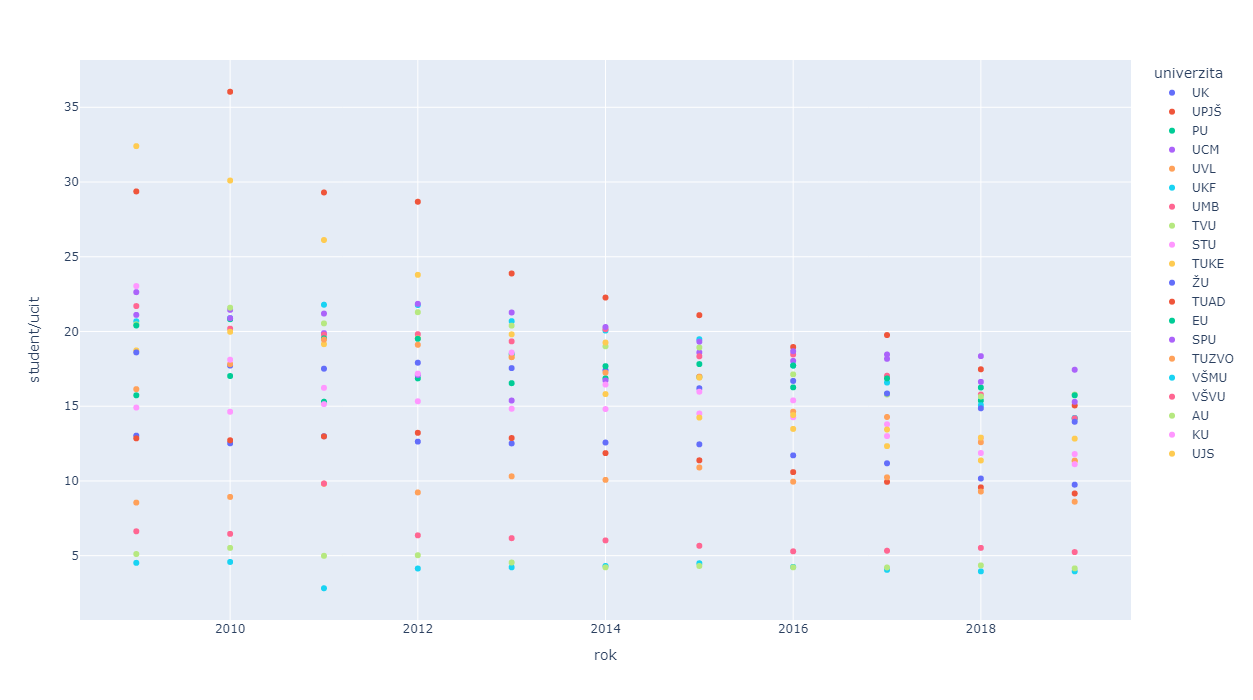

In [54]:
px.scatter(studenti, x="rok", y="student/ucit", color="univerzita", height=700)